**Test File** 

In [ ]:
from pyimzml.ImzMLParser import ImzMLParser

p = ImzMLParser('Example.imzml')
my_spectra = []
for idx, (x,y,z) in enumerate(p.coordinates):
    mzs, intensities = p.getspectrum(idx)
    my_spectra.append([mzs, intensities, (x, y, z)])
    

In [36]:

# Now `my_spectra` contains the spectra with their coordinates
# You can process or analyze `my_spectra` as needed
print(f"Total spectra loaded: {len(my_spectra)}")


spectrumx = my_spectra[0]
for spectrum in my_spectra:
    if spectrum[2][2] != 1 or len(spectrum[0]) != len(spectrum[1]):
        print(f"m/z ratio's:", len(spectrum[0]), "first 5 being", spectrum[0][:5])
        print(f"Intensities:", len(spectrum[1]), "first 5 being", spectrum[1][:5])
        print(f"Coordinate:", spectrum[2])
        


Total spectra loaded: 160000


**1. The above cell show that there are only 2 relevant coordinates (x,y) since z=1 for each spectrum**

**From this we can conclude that each spectrum can be plotted on a cartesian plane**

**2. We can see that we always have the same number of intensities as m/z ratios**

**With this array, we can plot the 2D graph of intensities vs m/z for a single pixel point**



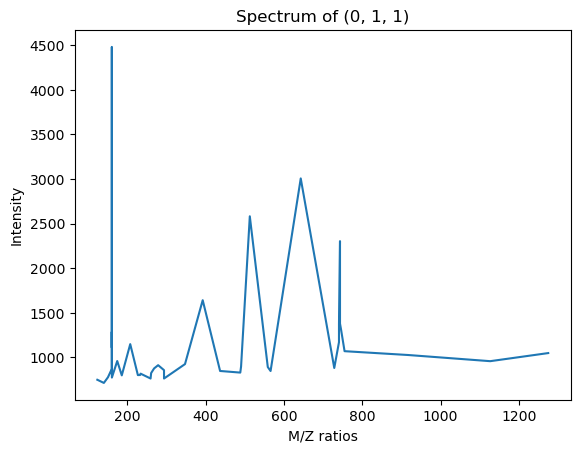

Points found 160000


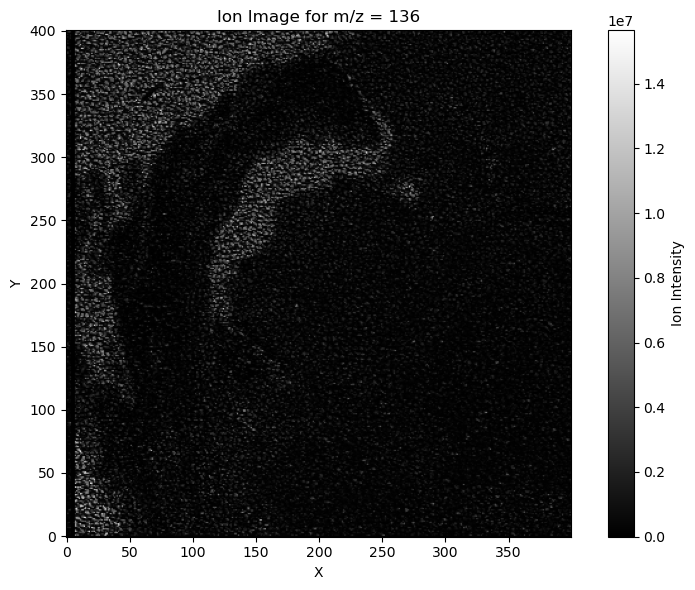

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(spectrumx[0],spectrumx[1])
title = "Spectrum of " + str(spectrumx[2])
plt.title(title)
plt.xlabel("M/Z ratios")
plt.ylabel("Intensity")
plt.show()




# Choose the m/z you want to plot  and tolerance
target_mz = 136
tolerance = 100

# Step 1: Get image dimensions
# all_coords = [coord for _, _, coord in my_spectra]
# xs, ys, _ = zip(*all_coords)
# width = max(xs) + 1
# height = max(ys) + 1
# print(width,height)
width = 400
height = 401

# Step 2: Create empty image
ion_image = np.zeros((height, width))

# Step 3 Fill in the ion image with intensities for target m/z
times = 0 
for mzs, intensities, (x, y, _) in my_spectra:
    # Get mask of indices where mz is within target window
    mz_mask = (mzs >= target_mz - tolerance) & (mzs <= target_mz + tolerance)
    if np.any(mz_mask):
        times+=1
        # Sum intensities in that range (or take max, mean, etc.)
        ion_intensity = np.sum(intensities[mz_mask])
        ion_image[y, x] = ion_intensity  # Note: imzML uses (x, y)
print(f"Points found", times)
# Step 4: Plot the ion image
plt.figure(figsize=(8, 6))
plt.imshow(ion_image, cmap='gray', origin='lower')
plt.colorbar(label='Ion Intensity')
plt.title(f"Ion Image for m/z = {target_mz}")
plt.xlabel("X")
plt.ylabel("Y")
plt.tight_layout()
plt.show()